In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('MonthWiseMarketArrivals.csv')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [4]:
# from pandas import read_csv
# series = read_csv('daily-total-female-births-in-cal.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
# print(type(series))
# print(series.head())

In [5]:
# from pandas import read_csv
# from matplotlib import pyplot
# from statsmodels.tsa.seasonal import seasonal_decompose

# result = seasonal_decompose(df2, model='add')
# result.plot()
# pyplot.show()

In [6]:
def fetch_count_and_percent_of_null(data):  # data is df
    nv = data.isnull().sum()  # nv = null values
    nv = nv[nv>0]
    res = pd.DataFrame({'Feature':nv.index,'Count_Null':nv.values,
                       'Percent_Null':(nv.values/data.shape[0])*100})
    res = res.sort_values('Percent_Null',ascending=False)
    return res

In [7]:
fetch_count_and_percent_of_null(df)

,Feature,Count_Null,Percent_Null


In [8]:
df["date"]=pd.to_datetime(df['date'],format="%B-%Y")

In [9]:
df["date"]

0       2005-01-01
1       2006-01-01
2       2010-01-01
3       2011-01-01
4       2012-01-01
           ...    
10222   2011-12-01
10223   2012-12-01
10224   2013-12-01
10225   2014-12-01
10226   2015-12-01
Name: date, Length: 10227, dtype: datetime64[ns]

In [ ]:
df=df.set_index("date")

In [ ]:
df.head()

In [10]:
mumbai_data=df[df["state"]=="MS"]

In [11]:
mumbai_data.shape

(4354, 10)

In [ ]:
mumbai_data.reset_index(inplace=True)

In [12]:
mumbai_data["date"].duplicated().sum()

4112

In [13]:
df2=mumbai_data.groupby("date")["priceMod"].mean().reset_index().sort_values(by="date",ascending=True)

In [14]:
df2.head()

,date,priceMod
0,1996-01-01,226.0
1,1996-02-01,186.0
2,1996-03-01,243.0
3,1996-04-01,254.0
4,1996-05-01,269.0


In [21]:
df2.dtypes

date        datetime64[ns]
priceMod           float64
dtype: object

In [22]:
#df2["date"]=pd.to_datetime(df2['date'],format="%B-%Y")

In [23]:
#df2.reset_index("date",inplace=True)

## 

In [24]:
df2.to_csv("Mumbai_data.csv")

In [25]:
from pandas import read_csv
series = read_csv('Mumbai_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.frame.DataFrame'>
         date  priceMod
0  1996-01-01     226.0
1  1996-02-01     186.0
2  1996-03-01     243.0
3  1996-04-01     254.0
4  1996-05-01     269.0


In [27]:
print(series.describe())

          priceMod
count   242.000000
mean    717.382884
std     657.645943
min     148.200000
25%     301.638889
50%     499.164835
75%     875.308352
max    4055.000000


In [32]:
df2.set_index("date",inplace=True)

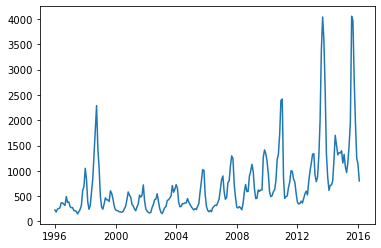

In [33]:
plt.plot(df2)

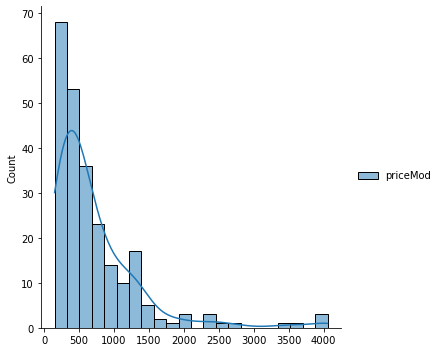

In [36]:
sns.displot(df2,kde=True)

<AxesSubplot:xlabel='priceMod', ylabel='Density'>

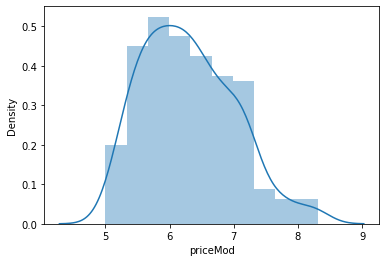

In [41]:
import numpy as np
sns.distplot(np.log(df2["priceMod"]),kde=True)

<AxesSubplot:xlabel='priceMod', ylabel='Density'>

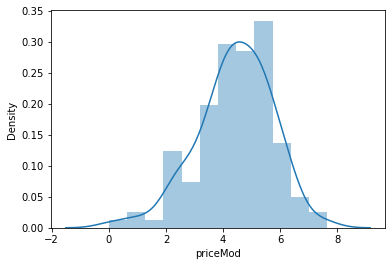

In [40]:
import numpy as np
sns.distplot(np.log(df2["priceMod"].diff().dropna()),kde=True)

<AxesSubplot:xlabel='priceMod', ylabel='Density'>

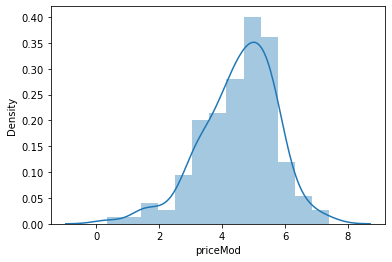

In [42]:
import numpy as np
sns.distplot(np.log(df2["priceMod"].diff().diff().dropna()),kde=True)